# Predicting Diabetes in a patient using Classification Algorithm

## Dataset Overview: Diabetes Prediction

**This dataset includes health-related attributes aimed at aiding the development of models for predicting diabetes risk. This dataset was downloaded from kaggle with the purpose of training AI model to diagnose a patient of diabetes base off new data.**

**Column description of the dataset:**

* Id: Unique identifier for each entry.
* Pregnancies: Number of pregnancies.
* Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
* BloodPressure: Diastolic blood pressure (mm Hg).
* SkinThickness: Triceps skinfold thickness (mm).
* Insulin: 2-hour serum insulin (mu U/ml).
* BMI: Body mass index (weight in kg / height in m²).
* DiabetesPedigreeFunction: Genetic diabetes score.
* Age: Age in years.
* Outcome: Presence (1) or absence (0) of diabetes.

### Importing Data Manipulation and Visualization Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline 

In [ ]:
# Reading the data
data = pd.read_csv('Diabetes_data.csv')

In [ ]:
# Checking the first 5 records
data.head()

### Exploratory Data Analysis (EDA)

In [ ]:
# getting more information on the data
data.info()

In [ ]:
# getting statistical summary of the numerical columns
data.describe()

In [ ]:
# Checking for total missing values
data.isnull().sum()

In [ ]:
# checking for columns exact names
data.columns

In [ ]:
# The Id Column is just an identification to each unique data that was collected so it is now of no use
data.drop('Id',axis=1, inplace=True)

In [ ]:
# checking for total duplicate values
data.duplicated().sum()

In [ ]:
# Checking unique values
data.nunique()

In [ ]:
data['Glucose'].unique()

In [ ]:
# Chcking how many patients in the dataset has diabetes
data['Outcome'].value_counts()

### Visualization

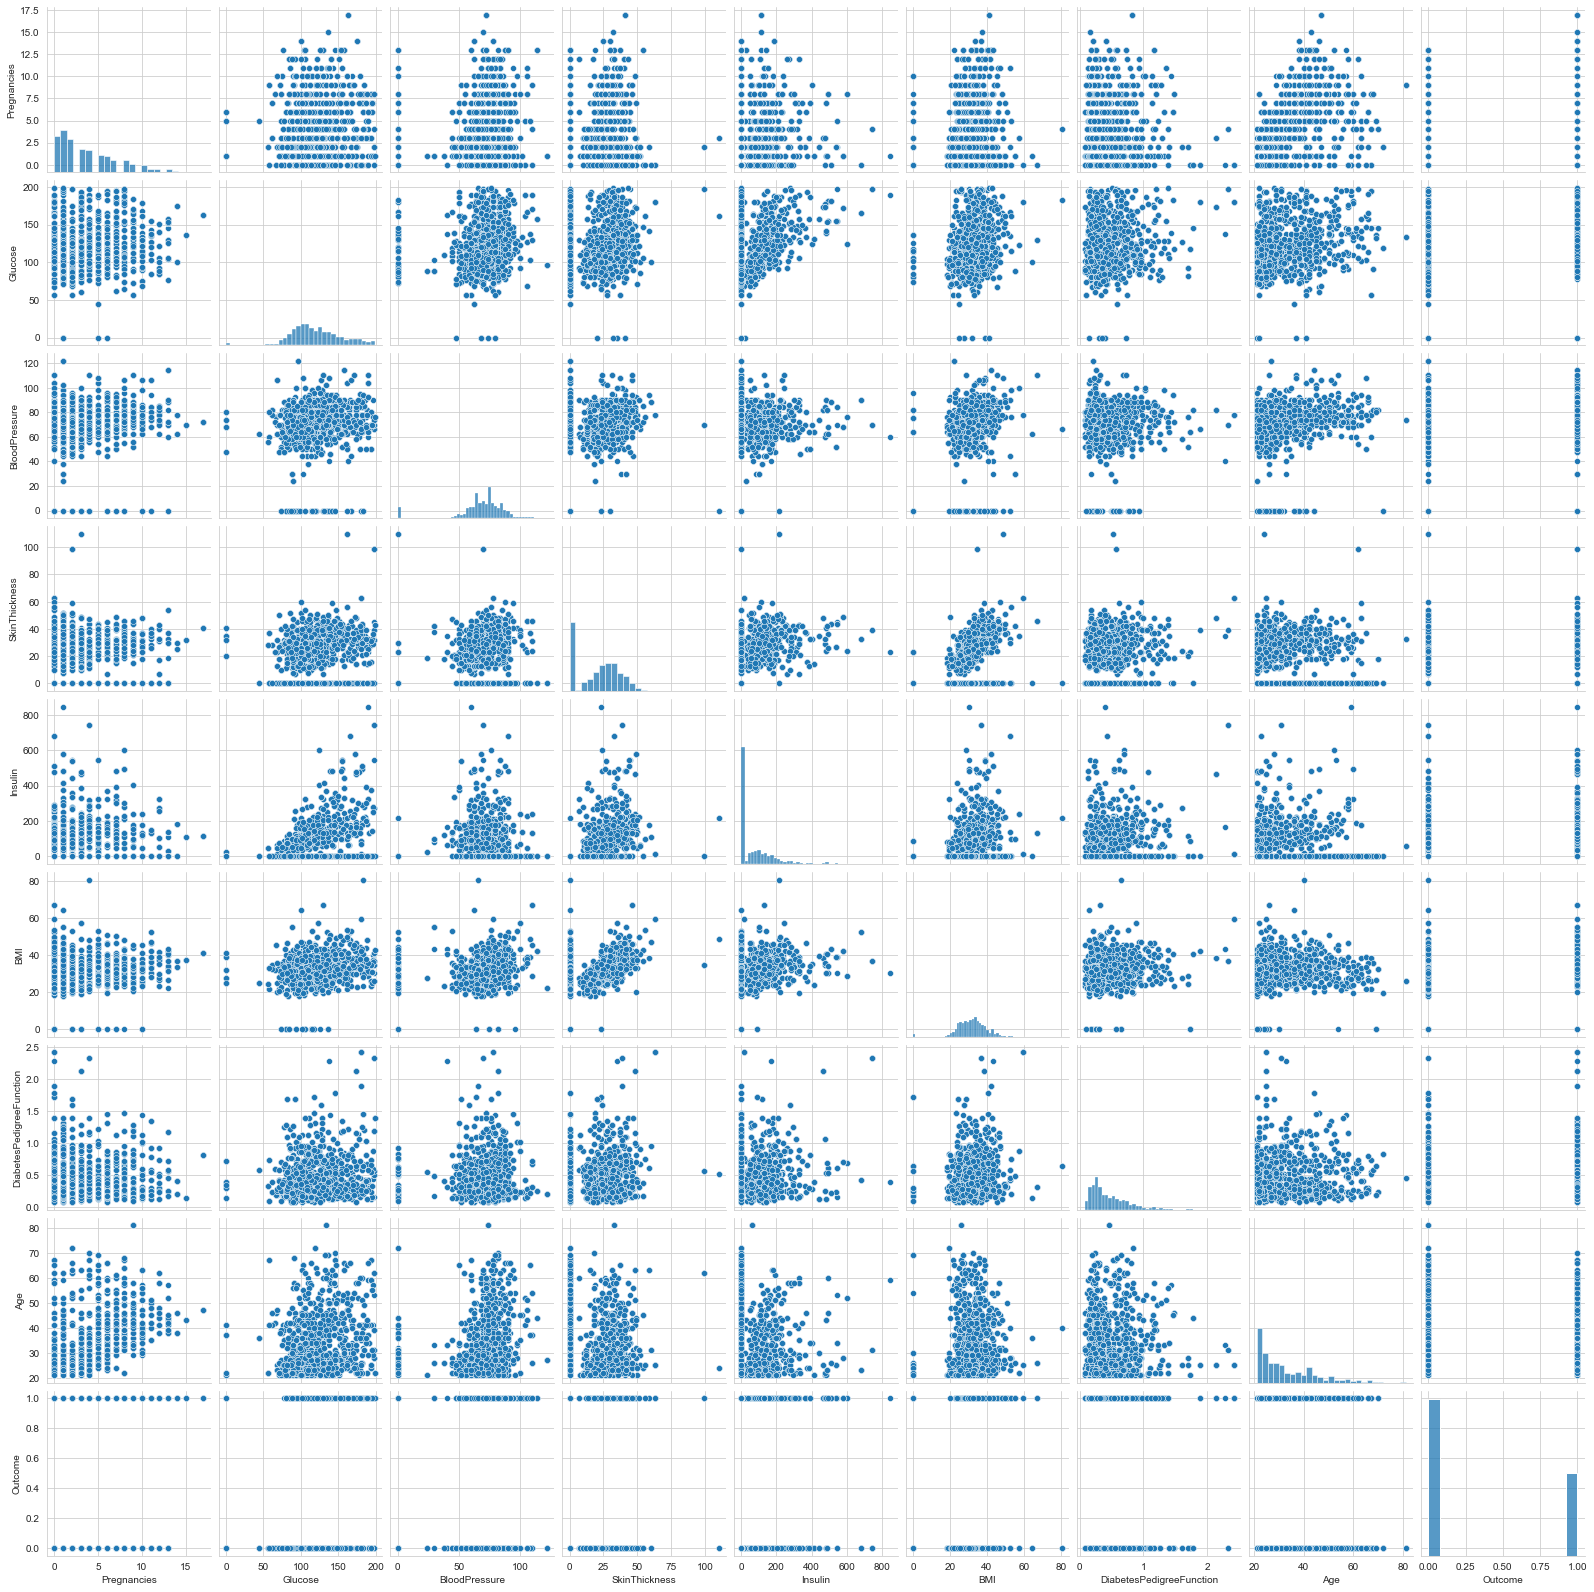

In [59]:
# Checking correlation betweeen the datasets
sns.pairplot(data)

In [ ]:
# Visualization of how many patients has diabetes with countplot
sns.countplot(x=data['Outcome'])
plt.xlabel('Has Diabetes? 0 = No  ||  1 = Yes')
plt.ylabel('Number of patients')
plt.title('Countplot of Dialectical and Non-Diabetical Patients')

In [ ]:
# Diabetical and non-diabetical patients via percent
sns.set_style('whitegrid')
plt.pie(data.groupby('Outcome').size(), labels = data['Outcome'].unique(),shadow=True, autopct = "%0.2f%%", startangle=90)
plt.show()

In [ ]:
# correlation between out data
relation = abs(data.corr())

In [ ]:
# Heatmap of the correlation matix of the Correlation between our data
plt.figure(figsize=(13,9))
sns.heatmap(relation, vmin=0, vmax=1, cmap='crest_r', fmt='.2f', annot=True,)

In [ ]:
# Relationship between AGE and INSULIN
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='Age', y='Insulin', hue='Outcome')

In [ ]:
# Relationship between AGE and BMI
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='Age', y='BMI', hue='Outcome')

In [ ]:
# Relationship between AGE and GLUCOSE
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome')

In [ ]:
# Distribution of Columns with Outcome (Diabetical and non-diabetical patients)

plt.figure(figsize=(15,13))

col_list =['Glucose', 'Insulin', 'BMI', 'BloodPressure', 'Age', 'Pregnancies']

for col in range(len(col_list)):
    plt.subplot(3, 3, col + 1)
    plt.title(col_list[col])
    sns.histplot(data=data, x=data[col_list[col]], hue='Outcome')

plt.tight_layout()

### Splitting data into the values and target

In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

### Importing Some Scikit-Learn Libraries

In [ ]:
from sklearn.model_selection import train_test_split # libraries to split the data into testing and training set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # to get report, accuracy and confusion matrix

### Splitting into test and train set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.73, random_state=17)

### Using Logistic Regression

In [ ]:
# Importing libraries for logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter=5000)

In [ ]:
log_model.fit(X_train, y_train) # fitting the data into the model

In [ ]:
log_pred = log_model.predict(X_test)

In [75]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, log_pred)} \n---------------------------------\nAccuracy Score: {accuracy_score(y_test, log_pred)} \n---------------------------------\nClassification Report: {classification_report(y_test, log_pred)}")

Confusion Matrix:
[[437  52]
 [104 155]] 
---------------------------------
Accuracy Score: 0.7914438502673797 
---------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.89      0.85       489
           1       0.75      0.60      0.67       259

    accuracy                           0.79       748
   macro avg       0.78      0.75      0.76       748
weighted avg       0.79      0.79      0.79       748



### Using Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree_model = DecisionTreeClassifier(random_state=25)

In [78]:
# fitting the train set into the Decision Tree Classifier Model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [79]:
tree_pred = tree_model.predict(X_test)

In [80]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, tree_pred)} \n---------------------------------\nAccuracy Score: {accuracy_score(y_test, tree_pred)} \n---------------------------------\nClassification Report: {classification_report(y_test, tree_pred)}")

Confusion Matrix:
[[480   9]
 [  1 258]] 
---------------------------------
Accuracy Score: 0.9866310160427807 
---------------------------------
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       489
           1       0.97      1.00      0.98       259

    accuracy                           0.99       748
   macro avg       0.98      0.99      0.99       748
weighted avg       0.99      0.99      0.99       748



### Using Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
forest_model = RandomForestClassifier(n_estimators=237)

In [83]:
# fitting the train set into the Random Forest Classifier Model
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=237)

In [ ]:
from sklearn.metrics import r2, rmse

In [84]:
forest_pred = forest_model.predict(X_test)

In [ ]:
rmse(y_test, forest_pred)

In [ ]:
np.sqrt(rmse(y_test, forest_pred))

In [85]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, forest_pred)} \n---------------------------------\nAccuracy Score: {accuracy_score(y_test, forest_pred)} \n---------------------------------\nClassification Report:\n {classification_report(y_test, forest_pred)}")

Confusion Matrix:
[[483   6]
 [  2 257]] 
---------------------------------
Accuracy Score: 0.9893048128342246 
---------------------------------
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99       489
           1       0.98      0.99      0.98       259

    accuracy                           0.99       748
   macro avg       0.99      0.99      0.99       748
weighted avg       0.99      0.99      0.99       748



### Checking for best performing model

In [86]:
Forest_Score = accuracy_score(y_test, forest_pred)
Tree_Score = accuracy_score(y_test, tree_pred)
Logis_Score = accuracy_score(y_test, log_pred)


tried_models = {
    'Used Models': ['Logistic Regression','Decision Tree', 'Random Forest'],
    'Accuracy': [Logis_Score, Tree_Score, Forest_Score]
}

All_models = pd.DataFrame(tried_models)
All_models.sort_values(by='Accuracy', ascending=False)

,Used Models,Accuracy
2,Random Forest,0.989305
1,Decision Tree,0.986631
0,Logistic Regression,0.791444


#### The Random Forest Model performed more better than the other models, so it will be save for deployment purpose

In [87]:
# importing pickle for saving and loading to be certain it works
from pickle import dump, load

In [88]:
# Saving... to a binary file in .pkl extension
with open('Diabetes saved.pkl', 'wb') as mod:
    dump(forest_model, mod)

In [89]:
with open('Diabetes saved.pkl','rb') as loaded:
    pkl_model = load(loaded)

In [90]:
pkl_model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

# The trained model is now fully ready for deployment